In [22]:
import pandas as pd
from src import utils

import matplotlib.pyplot as plt
%matplotlib inline

# Baca File Raw

In [23]:
CONFIG_FILE = utils.config_load()
CONFIG_FILE

{'raw_dataset_path': 'data/raw/sales_history.csv',
 'dataset_path': 'data/output/data.pkl',
 'dataset_train_path': 'data/output/data_train.pkl',
 'dataset_test_path': 'data/output/data_test.pkl',
 'X_train_path': 'data/output/X_train.pkl',
 'X_train_clean_path': 'data/output/X_train_clean.pkl',
 'y_train_path': 'data/output/y_train.pkl',
 'X_test_path': 'data/output/X_test.pkl',
 'X_test_clean_path': 'data/output/X_test_clean.pkl',
 'y_test_path': 'data/output/y_test.pkl',
 'datetime_col': 'Date',
 'features_col': ['Date'],
 'target_col': 'Weekly_Sales',
 'last_date_train': '2012-01'}

In [24]:
def read_data(return_file=False):
    """Read the history data"""
    # Read & parse data
    data = pd.read_csv(CONFIG_FILE['raw_dataset_path'],
                       parse_dates = [CONFIG_FILE['datetime_col']])

    # Extract metadata
    features_col = data.columns.tolist()
    classes_col = [col_class.name for col_class in data.dtypes.tolist()]
    contents_col = [data[col].head(3).tolist() for col in features_col]
    
    # Validate
    print('Data shape       :', data.shape)
    print('Features columns :', features_col)
    print('Class columns    :', classes_col)
    print('Content columns  :', contents_col)

    # Dump data
    utils.pickle_dump(data, CONFIG_FILE['dataset_path'])

    if return_file:
        return data
    

In [25]:
data = read_data(return_file=True)
data.head()

Data shape       : (143, 4)
Features columns : ['Store', 'Dept', 'Date', 'Weekly_Sales']
Class columns    : ['int64', 'int64', 'datetime64[ns]', 'float64']
Content columns  : [[1, 1, 1], [1, 1, 1], [Timestamp('2010-02-05 00:00:00'), Timestamp('2010-02-12 00:00:00'), Timestamp('2010-02-19 00:00:00')], [24924.5, 46039.49, 41595.55]]
Data has been dumped to path: data/output/data.pkl


,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


# Split Train vs Test

In [26]:
CONFIG_FILE = utils.config_load()
CONFIG_FILE

{'raw_dataset_path': 'data/raw/sales_history.csv',
 'dataset_path': 'data/output/data.pkl',
 'dataset_train_path': 'data/output/data_train.pkl',
 'dataset_test_path': 'data/output/data_test.pkl',
 'X_train_path': 'data/output/X_train.pkl',
 'X_train_clean_path': 'data/output/X_train_clean.pkl',
 'y_train_path': 'data/output/y_train.pkl',
 'X_test_path': 'data/output/X_test.pkl',
 'X_test_clean_path': 'data/output/X_test_clean.pkl',
 'y_test_path': 'data/output/y_test.pkl',
 'datetime_col': 'Date',
 'features_col': ['Date'],
 'target_col': 'Weekly_Sales',
 'last_date_train': '2012-01'}

In [27]:
# Split data
cond_train = data[CONFIG_FILE['datetime_col']] <= CONFIG_FILE['last_date_train']
data_train = data[cond_train]
data_test = data[~cond_train]

print('Data train shape :', data_train.shape)
print('Data test shape  :', data_test.shape)

Data train shape : (100, 4)
Data test shape  : (43, 4)


In [28]:
def split_train_test(return_file=False):
    """Split train & test data"""
    # Load data
    data = utils.pickle_load(CONFIG_FILE['dataset_path'])
    
    # Get the train data conditions
    cond_train = data[CONFIG_FILE['datetime_col']] <= CONFIG_FILE['last_date_train']

    # Split the data
    data_train = data[cond_train]
    data_test = data[~cond_train]

    # Validate the data
    print('Data train shape :', data_train.shape)
    print('Data test shape  :', data_test.shape)

    # Dump the data
    utils.pickle_dump(data_train, CONFIG_FILE['dataset_train_path'])
    utils.pickle_dump(data_test, CONFIG_FILE['dataset_test_path'])

    if return_file:
        return data_train, data_test

In [29]:
data_train, data_test = split_train_test(return_file=True)

Data train shape : (100, 4)
Data test shape  : (43, 4)
Data has been dumped to path: data/output/data_train.pkl
Data has been dumped to path: data/output/data_test.pkl


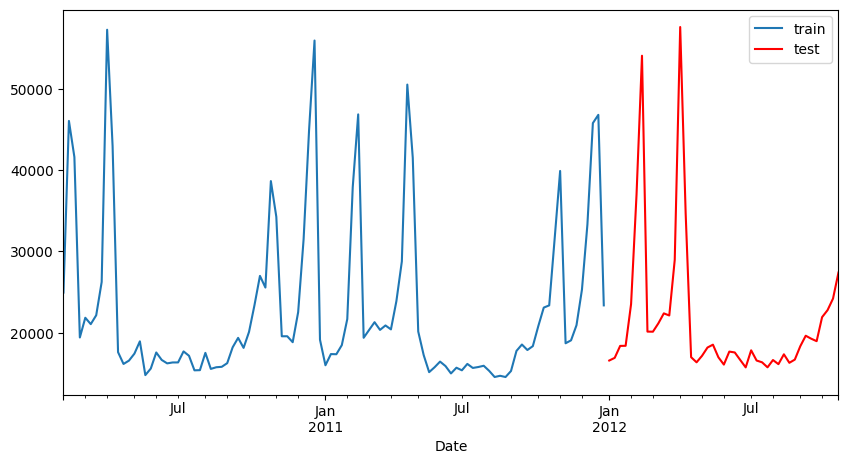

In [30]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

data_train.plot(x='Date', y='Weekly_Sales', label='train', ax=ax)
data_test.plot(x='Date', y='Weekly_Sales', c='red', label='test', ax=ax)

plt.legend()
plt.show()

In [31]:
# Split X & y
def split_input_ouput(type, return_file=False):
    """Split input (X) and output (y)"""
    # Load data
    data = utils.pickle_load(CONFIG_FILE[f'dataset_{type}_path'])
    
    # Split input & output
    y = data[CONFIG_FILE['target_col']]
    X = data.drop(columns=[CONFIG_FILE['target_col']], axis=1)
    
    # validate
    print('Data input (X) shape  :', X.shape)
    print('Data output (y) shape :', y.shape)
    
    # dump file
    utils.pickle_dump(X, CONFIG_FILE[f'X_{type}_path'])
    utils.pickle_dump(y, CONFIG_FILE[f'y_{type}_path'])
    
    if return_file:
        return X, y

In [32]:
X_train, y_train = split_input_ouput(type='train', return_file=True)
X_test, y_test = split_input_ouput(type='test', return_file=True)

Data input (X) shape  : (100, 3)
Data output (y) shape : (100,)
Data has been dumped to path: data/output/X_train.pkl
Data has been dumped to path: data/output/y_train.pkl
Data input (X) shape  : (43, 3)
Data output (y) shape : (43,)
Data has been dumped to path: data/output/X_test.pkl
Data has been dumped to path: data/output/y_test.pkl
